# STABLA
## Definicija
Stablo je struktura podataka koja se sastoji od čvorova i bridova (pritom ne smiju postojati ciklusi). Stablo koje nema čvorova se naziva prazno stablo. Stablo koje nije prazno se sastoji od korijena i potencijalno dosta razina čvorova te se na taj način stvara hijerarhija (odnos "podređeni-nadređeni" ili "dijete-roditelj").  

## Terminologija koju ćemo koristiti
+ **korijen** - čvor na vrhu stabla
+ **oznaka** od čvora x - vrijednost koja je pridružena čvoru
+ **dijete** od čvora x - čvor koji je povezan sa čvorom x i nalazi se u smjeru suprotnom od korijena
+ **roditelj** od čvora x - čvor koji je povezan sa čvorom x i nalazi se u smjeru korijena stabla
+ **list** - čvor bez djece
+ **unutrašnji čvor** - čvor koji nije list

# Binarno stablo
Umjesto stabala (koja se često razmatraju u matematici) u računarstvu se još češće pojavljuju binarna stabla. Radi se o nešto jednostavnijem i pravilnije građenom objektu kojeg je lakše prikazati u računalu. Binarno stablo je struktura podataka u kojem svaki čvor može imati lijevo dijete i desno dijete.

# Potpuno binarno stablo
Potpuno binarno stablo je binarno stablo u kojem svi unutrašnji čvorovi imaju oba djeteta i svi listovi se nalaze na istoj dubini.

In [1]:
from IPython.display import display
from ipywidgets import interact
import networkx as nx
import matplotlib.pyplot as plt

#pos je bio izgeneriran funkcijom, ali zbog preglednosti je ovdje hard kodiran
pos = {
     0: [0, 0],
     1: [-1, -1],
     2: [1, -1],
     3: [-1.5, -2], 
     4: [-0.5, -2],
     5: [0.5, -2],
     6: [1.5, -2],
     7: [-1.75, -3],
     8: [-1.25, -3],
     9: [-0.75, -3],
    10: [-0.25, -3],
    11: [0.25, -3],
    12: [0.75, -3],
    13: [1.25, -3],
    14: [1.75, -3] 
}

def draw_complete_binary_tree(n = 0):
    G = nx.balanced_tree(2, n)
    nx.draw(G, pos, with_labels=True, node_size = 800, node_color = "blue" )        

interact(draw_complete_binary_tree, n=(0, 3) );

interactive(children=(IntSlider(value=0, description='n', max=3), Output()), _dom_classes=('widget-interact',))

**Napomena 1.** Potpuno binarno stablo ne mora imati sve čvorove na zadnjoj razini. Npr. za n = 3, potpuno binarno stablo ne mora imati neke od čvorova na zadnjoj razini, npr. 13 i 14.

#  Binarno stablo pretraživanja
Binarno stablo pretraživanja je posebna vrsta binarnog stabla koja je izuzetno važna u mnogim primjenama. Oznake čvorova moraju zadovoljavati relaciju uređaja. U svakom čvoru oznaka mora biti veća od oznake lijevog djeteta i manja od oznake desnog djeteta.
U binarnom stablu pretraživanja možemo ubacivati i brisati čvorove, ali svaki put moramo paziti da gore navedeni uvjet ostane očuvan.

**Algoritam za pretraživanje:**
+ proslijedimo korijen stabla
+ ako je korijen prazan, vrijednost ne postoji u stablu
+ inače, ako je tražena oznaka jednaka oznaci korijena, pretraga je završila i vratimo pronađeni čvor
+ inače, ako je tražena oznaka strogo manja od korijena, pretražujemo lijevo podstablo
+ inače, pretražujemo desno podstablo

**Algoritam za ubacivanje:**
+ proslijedimo korijen stabla i oznaku koju želimo ubaciti
+ ako je oznaka jednaka oznaci korijena, čvor sa zadanom oznakom već postoji
+ ako je oznaka strogo manja od oznake korijena, ponavljamo postupak sa lijevim podstablom
+ inače, ponavljamo postupak sa desnim podstablom

**Algoritam za brisanje:**
Imamo tri moguća slučaja.
+ čvor nema djecu - jednostavno maknemo čvor
+ čvor ima jedno dijete: obrišemo čvor i zamijenimo ga sa njegovim djetetom
+ čvor ima oba djeteta: nađemo prvi čvor koji ima veću oznaku od zadanog (neka je to čvor A). Postavimo oznaku čvora na oznaku čvora A. Ako čvor A nije imao djecu, samo ga obrišemo, inače, zamijenimo oznaku čvora E sa oznakom njegovog djeteta.

Slijedi prikaz složenosti navedenih funkcionalnosti:

In [2]:
import pandas as pd
df = pd.DataFrame(
    {'' : ['Prostor', 'Pretraga', 'Ubacivanje', 'Brisanje'],
     'Prosječno' : [r'$O(n)$', r'$O(log n)$', r'$O(log n)$', r'$O(log n)$'],
     'Najgori slučaj' : [r'$O(n)$', r'$O(n)$', r'$O(n)$', r'$O(n)$']
})
df[['', 'Prosječno', 'Najgori slučaj']]

,,Prosječno,Najgori slučaj
0,Prostor,$O(n)$,$O(n)$
1,Pretraga,$O(log n)$,$O(n)$
2,Ubacivanje,$O(log n)$,$O(n)$
3,Brisanje,$O(log n)$,$O(n)$


**Napomena 2.** Složenost pretrage, ubacivanja i brisanja je u prosjeku  $O(logn)$, ali najgori slučaj je ipak $O(n)$, to se dogodi kad binarno stablo nije balansirano, primjer bi bio kad bi svaki čvor imao samo desno dijete.

Slijedi implementacija binarnog stabla pretraživanja (brisanje nije implementirano):

In [3]:
from enum import Enum
class Color(Enum):
    RED = 'red'
    BLACK = 'grey'
class Node:
    def __init__(self, data):
        self.data = data
        self.color = Color.RED
        self.left = None
        self.right = None
        self.parent = None
class BinarySearchTree:
    def __init__(self):
        self.root = None
    def clear(self):
        self.root = None
    def insert(self, data):
        x = Node(data)
        self.root = self.BSTInsert(self.root, x)
    def BSTInsert(self, root, x):
        if root is None:
            return x
        elif x.data < root.data:
            root.left = self.BSTInsert(root.left, x)
            root.left.parent = root
        elif x.data > root.data:
            root.right = self.BSTInsert(root.right, x)
            root.right.parent = root
        return root
    def search(self, data):
        result = self.searchHelper(self.root, data)
        return result
    def searchHelper(self, root, data):
        if root is None:
            return False
        elif root.data == data:
            return root
        elif root.data < data:
            return self.searchHelper(root.right, data)
        else:
            return self.searchHelper(root.left, data)
    def inorder(self):
        self.inorderHelper(self.root)
    def inorderHelper(self, root):
        if root is None:
            return
        self.inorderHelper(root.left)
        print(root.data)
        self.inorderHelper(root.right)
    def preorder(self):
        self.preorderHelper(self.root)
    def preorderHelper(self, root):
        if root is None:
            return
        print(root.data)
        self.preorderHelper(root.left)
        self.preorderHelper(root.right)
    def postorder(self):
        self.postorderHelper(self.root)
    def postorderHelper(self, root):
        if root is None:
            return
        self.postorderHelper(root.left)
        self.postorderHelper(root.right)
        print(root.data)
    #Function that draws binary tree and supports colors of nodes.
    def drawTree(self, nodeSize = 200, width = 30, height = 5):
        G = nx.Graph(); val_map = {}; pos = {};
        self.drawTreeHelper(self.root, G, val_map, pos)
        values = [val_map.get(node) for node in G.nodes()]
        plt.rcParams["figure.figsize"] = (width, height)
        nx.draw(G, pos, with_labels=True, node_size = nodeSize, node_color=values)
    def drawTreeHelper(self, root, G, val_map, pos):        
        if root is None:
            return
        G.add_node(root.data)
        if root.parent is None:
            pos[root.data] = [0, 0]
        else:
            if root.parent.parent is None:
                if root.parent.left == root:
                    pos[root.data] = [-2**7, -1]
                else:
                    pos[root.data] = [2**7, -1]
            else:
                distance = 0.5 * abs(pos[root.parent.data][0] - pos[root.parent.parent.data][0])
                if root.parent.left == root:
                    pos[root.data] = [pos[root.parent.data][0] - distance, pos[root.parent.data][1] - 1]
                else:
                    pos[root.data] = [pos[root.parent.data][0] + distance, pos[root.parent.data][1] - 1]
        val_map[root.data] = root.color.value
        if root.left is not None:
            G.add_node(root.left.data)
            G.add_edge(root.data, root.left.data)
            val_map[root.data] = root.color.value
            self.drawTreeHelper(root.left, G, val_map, pos)
        if root.right is not None:
            G.add_node(root.right.data)
            G.add_edge(root.data, root.right.data)
            val_map[root.data] = root.color.value
            self.drawTreeHelper(root.right, G, val_map, pos)

## Vizualizacija napomene 2. 
U prvom primjeru bi u 3 koraka dali odgovor na to postoji li čvor sa oznakom 7, dok u drugom bi nam trebalo 7 koraka.
### Primjer 1.

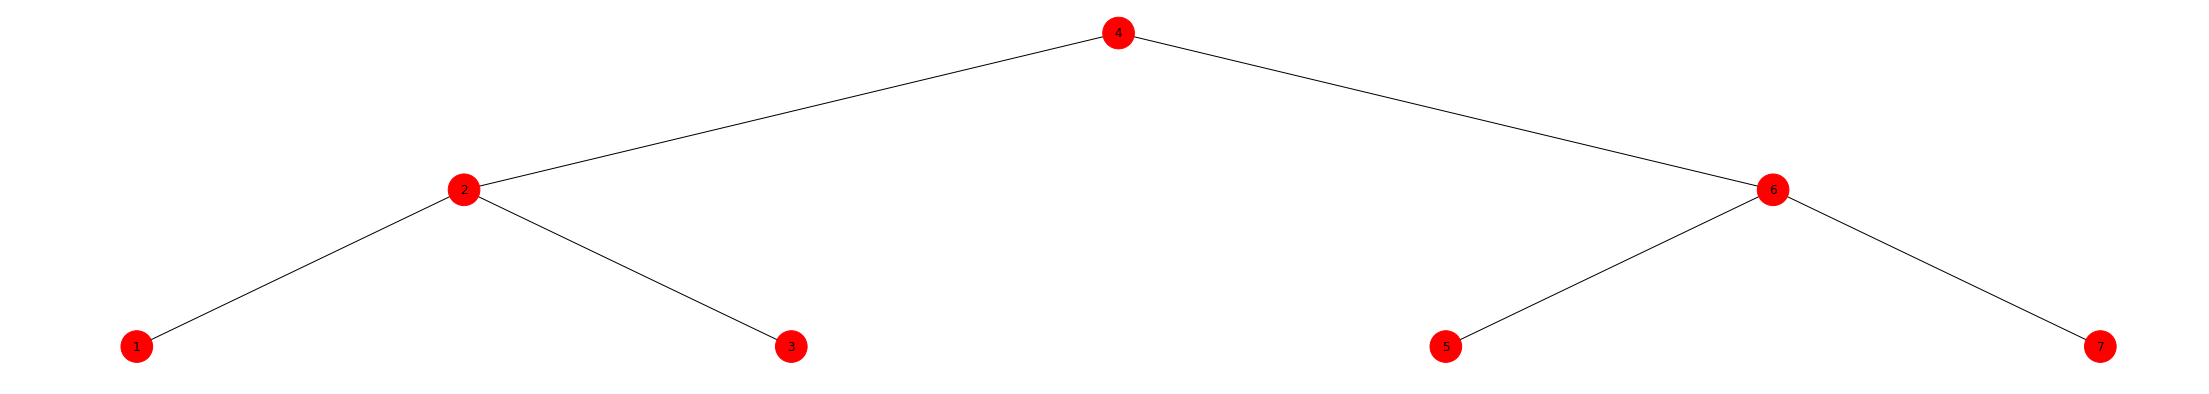

In [4]:
def generate_complete_binary_tree():
    bst = BinarySearchTree()
    for i in [4, 2, 3, 1, 6, 5, 7]:
        bst.insert(i)
    return bst
bst1 = generate_complete_binary_tree()
bst1.drawTree(1000)

### Primjer 2.

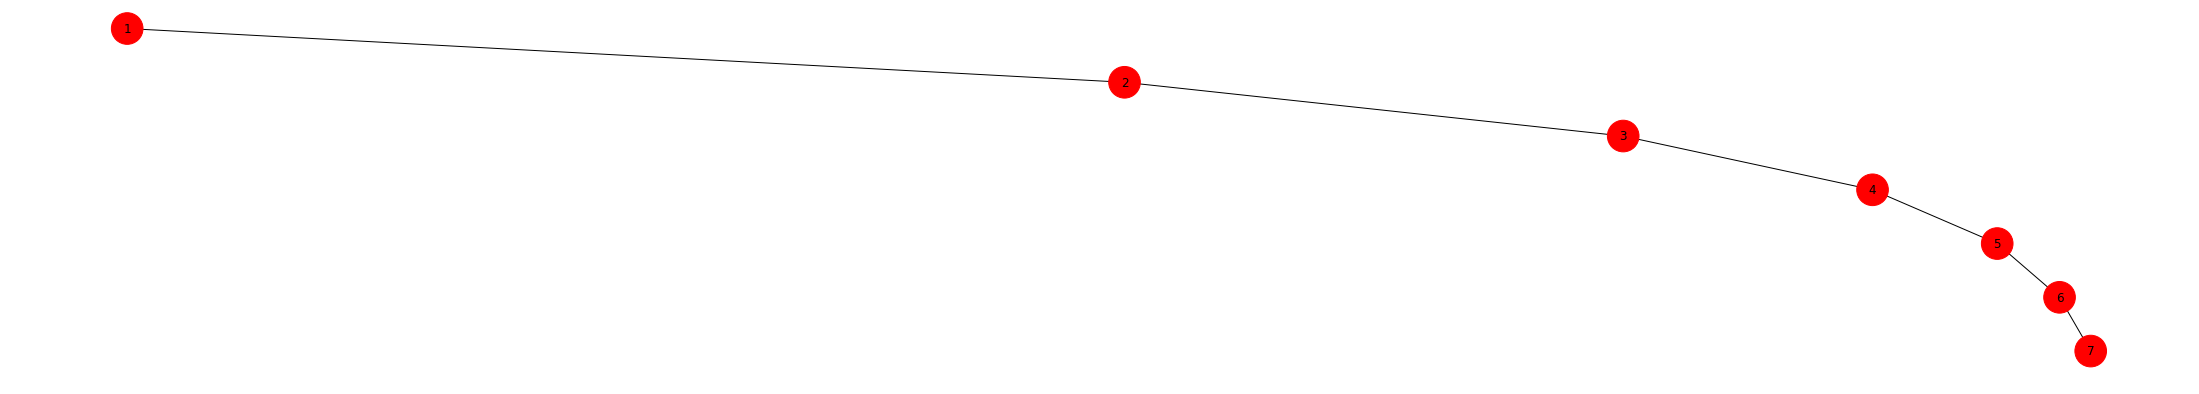

In [5]:
def generate_unbalanced_binary_tree():
    bst = BinarySearchTree()
    for i in range(7):
        bst.insert(i + 1)
    return bst
bst2 = generate_unbalanced_binary_tree()
bst2.drawTree(1000)

## Obilasci stabla
Obilazak stabla je algoritam kojim “posjećujemo” čvorove stabla, tako da svaki čvor posjetimo točno jednom. To je potrebno ako želimo obaviti neku obradu nad svim čvorovima (npr. ispisati oznake). Primjetimo da svaki obilazak uspostavlja jedan linearni uređaj medu čvorovima. Najpoznatiji obilasci su: 
+ **PREORDER** – prvo posjećujemo čvor, a zatim njegovu djecu slijeva na desno.
+ **INORDER** – prvo posjećujemo prvo dijete (ako postoji), zatim sam čvor i ostatak djece slijeva na desno.
+ **POSTORDER** – posjećujemo djecu slijeva na desno i na kraju sam čvor.  

### PREORDER

In [6]:
bst3 = generate_complete_binary_tree()

def preorder_example(Korak = 1):
    order = [4, 2, 1, 3, 6, 5, 7]
    node = bst3.search(order[Korak - 1])
    node.color = Color.BLACK
    bst3.drawTree(1000)
    node.color = Color.RED
interact(preorder_example, Korak = (1, 7));

interactive(children=(IntSlider(value=1, description='Korak', max=7, min=1), Output()), _dom_classes=('widget-interact',))

### INORDER

In [7]:
bst4 = generate_complete_binary_tree()

def inorder_example(Korak = 1):
    order = [1, 2, 3, 4, 5, 6, 7]
    node = bst4.search(order[Korak - 1])
    node.color = Color.BLACK
    bst4.drawTree(1000)
    node.color = Color.RED
interact(inorder_example, Korak = (1, 7) );

interactive(children=(IntSlider(value=1, description='Korak', max=7, min=1), Output()), _dom_classes=('widget-interact',))

### POSTORDER

In [8]:
bst5 = generate_complete_binary_tree()

def postorder_example(Korak = 1):
    order = [1, 3, 2, 5, 7, 6, 4]
    node = bst5.search(order[Korak - 1])
    node.color = Color.BLACK
    bst5.drawTree(1000)
    node.color = Color.RED
interact(postorder_example, Korak =(1, 7) );

interactive(children=(IntSlider(value=1, description='Korak', max=7, min=1), Output()), _dom_classes=('widget-interact',))

# Crveno-crno stablo
Crveno-crno stablo je posebna vrsta binarnog stabla pretraživanja. Svaki čvor ima još jednu dodatnu vrijednost(boja), koja se koristi da bi se osigurala balansiranost prilikom ubacivanja i brisanja čvorova.

Balansiranost se čuva bojanjem svakog čvora jednom od dviju boja (crvena ili crna) na način da su zadovoljeni sljedeći uvjeti:
+ Svaki čvor je ili crven ili crn.
+ Korijen je crn.
+ Svaki list je crn.
+ Ako je čvor crven, onda su oba njegova djeteta crna.
+ Za svaki čvor, svaki put od njegova čvora do listova koji su mu potomci sadržava isti broj crnih čvorova.  

Slijedi prikaz složenosti najbitnijih funkcionalnosti:

In [9]:
import pandas as pd
df = pd.DataFrame(
    {'' : ['Prostor', 'Pretraga', 'Ubacivanje', 'Brisanje'],
     'Prosječno' : [r'$O(n)$', r'$O(log n)$', r'$O(log n)$', r'$O(log n)$'],
     'Najgori slučaj' : [r'$O(n)$', r'$O(log n)$', r'$O(log n)$', r'$O(log n)$']
})
df[['', 'Prosječno', 'Najgori slučaj']]

,,Prosječno,Najgori slučaj
0,Prostor,$O(n)$,$O(n)$
1,Pretraga,$O(log n)$,$O(log n)$
2,Ubacivanje,$O(log n)$,$O(log n)$
3,Brisanje,$O(log n)$,$O(log n)$


**Napomena 3.** Složenost pretrage, ubacivanja i brisanja je u najgorem slučaju $O(logn)$ što je puno bolje od običnog binarnog stabla pretraživanja.

Slijedi implementacija crveno-crnog stabla (brisanje nije implementirano):

In [10]:
class RedBlackTree(BinarySearchTree):
    def __init__(self):
        self.root = None
    def rotateLeft(self, root, x):
        y = x.right
        x.right = y.left
        if x.right is not None:
            x.right.parent = x
        y.parent = x.parent
        if x.parent is None:
            root = y
        elif x is x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y
        return root
    def rotateRight(self, root, x):
        y = x.left
        x.left = y.right
        if x.left is not None:
            x.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            root = y
        elif x is x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.right = x
        x.parent = y
        return root
    def insert(self, data):
        x = Node(data)
        if self.search(data) == False:
            self.root = self.BSTInsert(self.root, x)
            self.root = self.fixViolations(self.root, x)
    def fixViolations(self, root, x):
        parent = None
        grandparent = None
        while (x is not root) and (x.color is not Color.BLACK) and (x.parent.color is Color.RED):
            parent = x.parent
            grandparent = x.parent.parent
            if parent is grandparent.left:
                uncle = grandparent.right
                if (uncle is not None) and (uncle.color is Color.RED):
                    grandparent.color = Color.RED
                    parent.color = Color.BLACK
                    uncle.color = Color.BLACK
                    x = grandparent
                else:
                    if x is parent.right:
                        root = self.rotateLeft(root, parent)
                        x = parent
                        parent = x.parent
                    root = self.rotateRight(root, grandparent)
                    parent.color, grandparent.color = grandparent.color, parent.color
                    x = parent
            else:
                uncle = grandparent.left
                if (uncle is not None) and (uncle.color is Color.RED):
                    grandparent.color = Color.RED
                    parent.color = Color.BLACK
                    uncle.color = Color.BLACK
                    x = grandparent
                else:
                    if x is parent.left:
                        root = self.rotateRight(root, parent)
                        x = parent
                        parent = x.parent
                    root = self.rotateLeft(root, grandparent)
                    parent.color, grandparent.color = grandparent.color, parent.color
                    x = parent
        root.color = Color.BLACK
        return root

## Ubacivanje čvorova u crveno-crnom stablu.

In [11]:
from ipywidgets import Button, Text, HBox, VBox, Layout
from IPython.display import clear_output

def is_number(s):
    try:
        int(s)
    except ValueError:
        return False
    return True

redBlackTree = RedBlackTree()

def on_clear_clicked(b):
    redBlackTree.clear()
    clear_output()
    display(menu)
    
def on_insert_clicked(b):
    if is_number(value_text.value):
        clear_output()
        display(menu)
        redBlackTree.insert(int(value_text.value))
        redBlackTree.drawTree(800)
    else:
        clear_output()
        display(menu)
        redBlackTree.drawTree(800)
        print("Ulaz nije ispravan. Mora se unijeti broj.")
        
    
clear_button = Button(description='Obriši Crveno-Crno stablo', layout=Layout(width='50%', height='100%'))
insert_button = Button(description='Ubaci', layout=Layout(width='20%', height='100%'))
value_text = Text(layout=Layout(width='30%', height='100%'))

clear_button.on_click(on_clear_clicked)
insert_button.on_click(on_insert_clicked)
menu = VBox([VBox([clear_button]), HBox([insert_button, value_text])])
display(menu)

VBox(children=(VBox(children=(Button(description='Obriši Crveno-Crno stablo', layout=Layout(height='100%', width='50%'), style=ButtonStyle()),)), HBox(children=(Button(description='Ubaci', layout=Layout(height='100%', width='20%'), style=ButtonStyle()), Text(value='2', layout=Layout(height='100%', width='30%'))))))

## Generiranje crveno-crnog stabla 2000 čvorova.

Permutacija: [ 884  159 1819 1235 1080 ... 1328 1954 1307 1454 1306]


Button(description='Generiraj', layout=Layout(height='100%', width='50%'), style=ButtonStyle())

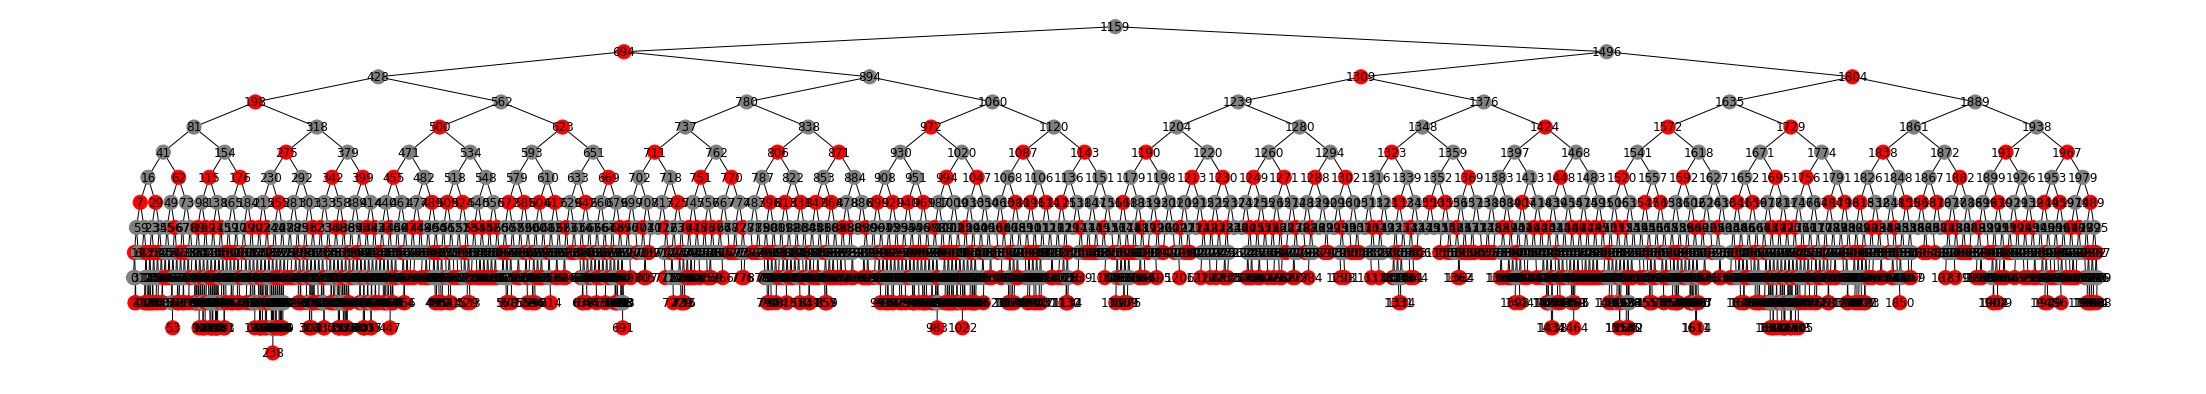

In [15]:
import numpy as np
np.set_printoptions(threshold = 30, edgeitems = 5)
rbt = RedBlackTree()
permutation = np.random.permutation(2000)
def on_generate_clicked(b):
    np.random.shuffle(permutation)
    rbt.clear()
    clear_output()
    print("Permutacija: " + str(permutation))
    display(generate_button)
    np.random.shuffle(permutation)
    for i in permutation:
        rbt.insert(i)
    rbt.drawTree()
    
generate_button = Button(description='Generiraj', layout=Layout(width='50%', height='100%'))
generate_button.on_click(on_generate_clicked)
display(generate_button)

## Generiranje binarnog stabla pretraživanja sa 2000 čvorova.

Permutacija: [1441  812 1915 1015 1282 ... 1883 1054  232 1162  840]


Button(description='Generiraj', layout=Layout(height='100%', width='50%'), style=ButtonStyle())

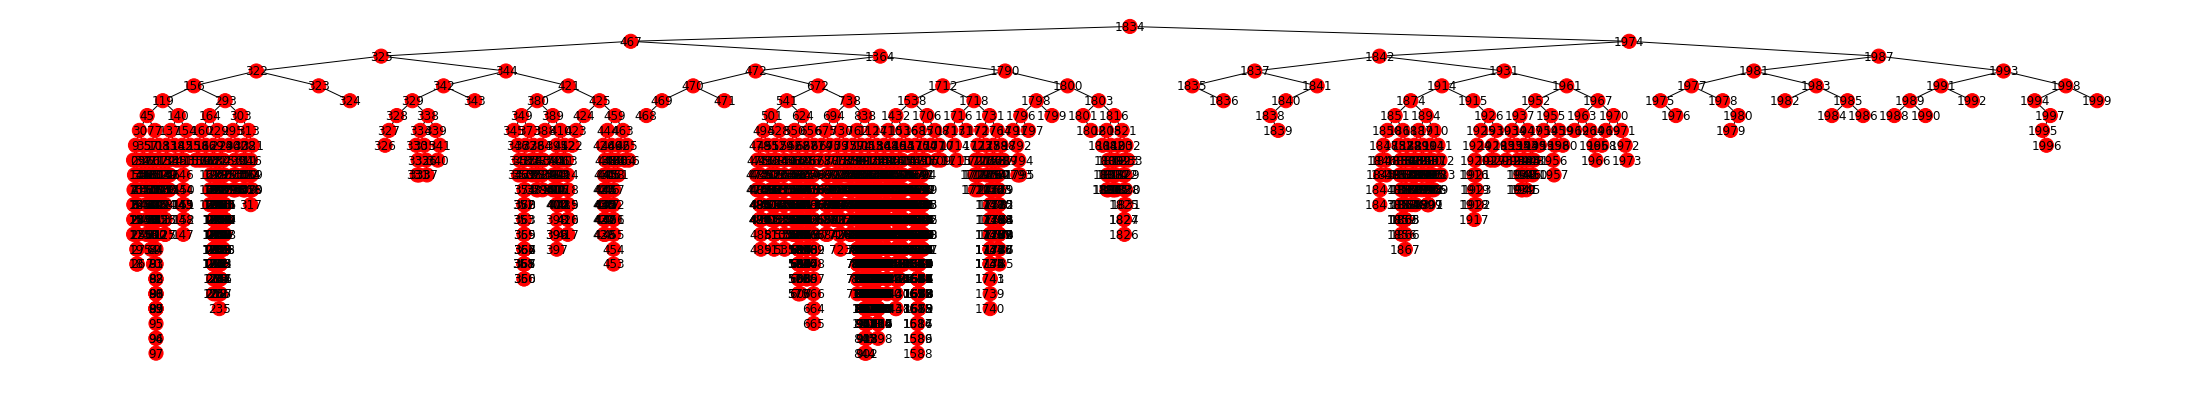

In [13]:
import numpy as np
np.set_printoptions(threshold = 10, edgeitems = 5)
bst6 = BinarySearchTree()
permutation = np.random.permutation(2000)
def on_generate_clicked(b):
    np.random.shuffle(permutation)
    bst6.clear()
    clear_output()
    print("Permutacija: " + str(permutation))
    display(generate_button)
    np.random.shuffle(permutation)
    for i in permutation:
        bst6.insert(i)
    bst6.drawTree()
    
generate_button = Button(description='Generiraj', layout=Layout(width='50%', height='100%'))
generate_button.on_click(on_generate_clicked)
display(generate_button)

## Vrijeme pretraživanja za najgori slučaj.
Uzlazni poredak oznaka, binarno stablo pretraživanja postane nebalansirano.

In [17]:
import timeit
rbt2 = RedBlackTree()
bst7 = BinarySearchTree()
permutation = np.random.permutation(2000)
permutation = np.sort(permutation)

for i in permutation:
    rbt2.insert(i)
    bst7.insert(i)
    
maximum_value = np.amax(permutation)    

start_time = timeit.default_timer()
rbt2.search(maximum_value)
rbt_time = timeit.default_timer() - start_time
print('Crveno-crno stablo: {:.20f}'.format(rbt_time))

start_time = timeit.default_timer()
bst7.search(maximum_value)
bst_time = timeit.default_timer() - start_time 
print('Binarno stablo pretraživanja: {:.20f}'.format(bst_time))

print("Kad smo koristili crveno-crno stablo " + '{:.2f}'.format(bst_time / rbt_time) + " smo puta brže našli čvor s oznakom " + str(maximum_value))

Crveno-crno stablo: 0.00004562583252720742
Binarno stablo pretraživanja: 0.00091926603423075903
Kad smo koristili crveno-crno stablo 20.15 smo puta brže našli čvor s oznakom 1999
